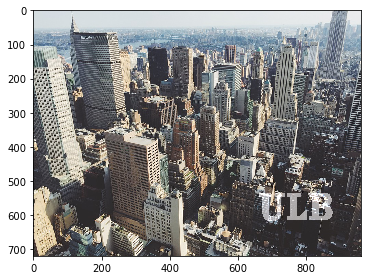

In [72]:
"""
Last name : TROUILLEZ
First name : Franck
Matricule : 000459766
Last update : 23/10/2020 15:10

This project allows the user to add a watermark to an image.

"""

from skimage.transform import rescale
from skimage.io import imread, imshow, imsave
%matplotlib inline

#################
### CONSTANTS ###
#################

SOURCE_IMAGE_NAME = "nyc.jpg";
WATERMARK_NAME = "watermark.png";

SAVE_IMAGE = True #set to True to save the image

OPACITY = 0.5 #0 to 1
SCALE = 1 # positive value; scale the watermark : 1 corresponds to its initialised size
RELATIVE_POSITION_ON_PICTURE = (0.8,0.8) #(x,y) where x,y are from 0 to 1

#############################
### FUNCTIONS DEFINITIONS ###
#############################

def darkCaseFunction(image, posX,posY,color,watermark,x,y):
    """
    Method called if the watermark is placed in a dark place.
    It returns a value of the pixel given increased by the watermark value (to whiten the pixel)
    """
    return min(255,image[posY,posX,color]+watermark[y,x])

def lightCaseFunction(image, posX,posY,color,watermark,x,y):
    """
    Method called if the watermark is placed in an enlighted place.
    It returns a value of the pixel given decreased by the watermark value (to darken the pixel)
    """
    return max(0,image[posY,posX,color]-watermark[y,x])
    
def getGreyLevelMean(image):
    """
    Method called to get the grey level mean value of an RGB image
    """
    return image[:,:,:].sum()/(3*(image.shape[0]*image.shape[1]))

def placeWatermark(watermark, sourceImage, relPos):
    """
    Method used to place a watermark on an image at a given position.
    It returns the resulting image
    """
    sizeX = sourceImage.shape[1]
    sizeY = sourceImage.shape[0]
    
    watermarkXPos = (int)(relPos[0]*sizeX)
    watermarkYPos = (int)(relPos[1]*sizeY)
    
    #We have to take care that we take positions inside the picture.
    left = max(0,watermarkXPos - watermark.shape[1]//2)
    right = min(sizeX,watermarkXPos + watermark.shape[1]//2)
    top = max(0,watermarkYPos - watermark.shape[0]//2)
    bottom = min(sizeY,watermarkYPos + watermark.shape[0]//2)
    
    #If the watermark is out of the image (top or left-side), it should not start from the beginning
    xOffset = -min(0,watermarkXPos - watermark.shape[1]//2)
    yOffset = -min(0,watermarkYPos - watermark.shape[0]//2)
    
    #By default, we use the function which whiten the pixels
    applicationFunction = darkCaseFunction
    #We get the grey level mean value of the area where we will place the watermark
    #If the mean value is closer to 255 than 0, the area is more enlighted than dark
    isSourceImageEnlightInWatermarkArea = getGreyLevelMean(sourceImage[top:bottom,left:right]) >= 128
    
    #If so, we choose to darken the pixels 
    if(isSourceImageEnlightInWatermarkArea):
        applicationFunction = lightCaseFunction
    
    #We do a copy of the image to work on and we iterate for each concerned pixel and for each RGB channel
    image = sourceImage.copy()
    for y in range(bottom-top):
        posY = top+y
        posYWatermark = y+yOffset
        for x in range(right-left):
            posX = left+x
            posXWatermark = x+xOffset
            for color in range(3):
                image[posY,posX,color] = applicationFunction(image, posX, posY, color, watermark, posXWatermark, posYWatermark)
    return image

######################
### MAIN EXECUTION ###
######################

try:
    image = imread(SOURCE_IMAGE_NAME)    
    watermark = imread(WATERMARK_NAME)
    #We lower the intensity of white pixels using the opacity
    watermark = watermark*(float)(OPACITY)
    try:
        #We rescale the watermark
        watermark = rescale(watermark, SCALE, order=0)
        #We place the watermark on the image
        imageWithWatermark = placeWatermark(watermark, image, RELATIVE_POSITION_ON_PICTURE)
    except OverflowError: #This error can occur if the SCALE parameter tends to 0. 
        #If the scale is too low, we can thus consider that the image will not be modified by adding a watermark
        imageWithWatermark = image
    #We display the image
    imshow(imageWithWatermark)
    #We save the image if it is asked
    if (SAVE_IMAGE):
        imsave("watermarked_"+SOURCE_IMAGE_NAME, imageWithWatermark)
except FileNotFoundError:
    print("Error, the files were not found")
except:
    print("Unexpected error during the execution")
    raise


